In [33]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math
import pandas as pd

### 读取data

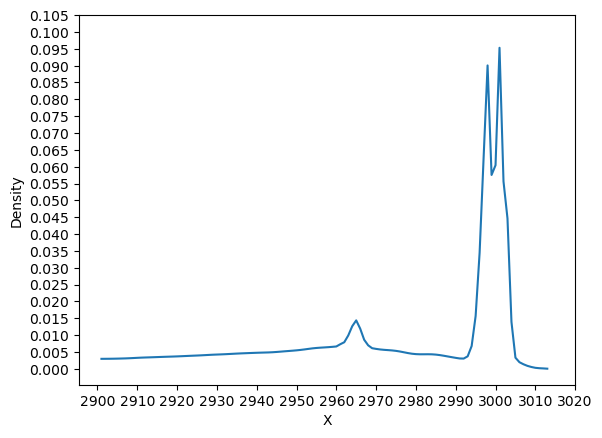

In [34]:
#读取数据
df = pd.read_table('data.TXT')
dataset = np.array(df,'float')

#归一化处理
sum_n = np.sum(dataset[:,1])
dataset[:,1] = dataset[:,1]/sum_n

plt.plot(dataset[:,0],dataset[:,1])

# 添加图例和标签
plt.xlabel('X')
plt.ylabel('Density')

# 设置横轴刻度
plt.xticks(np.arange(2900, 3030, 10))

# 设置纵轴刻度
plt.yticks(np.arange(0, 0.11, 0.005))

# 显示图形
plt.show()

### 直接抽样

In [35]:
n = 1000000
r = np.array([random.uniform(0, 1) for _ in range(n)])
x1 = np.zeros(n)

dataCum = [np.sum(dataset[:i+1,1]) for i in range(len(dataset[:,1]))]

for i in range(n):
    for j,pi in enumerate(dataCum):
        if r[i] <= pi:
            x1[i] = dataset[j,0]
            break



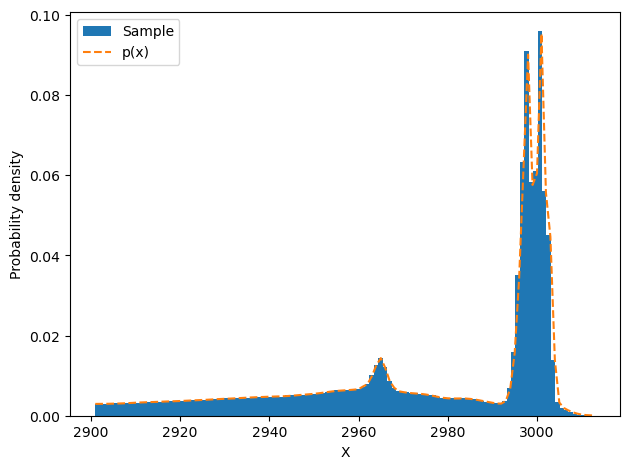

In [36]:
fig, ax = plt.subplots()
num_bins = len(dataset[:,0])

#画直方图
_, bins, patches = ax.hist(x1, num_bins, density=True,label='Sample')

ax.plot(dataset[:,0], dataset[:,1], '--',label="p(x)")
ax.set_xlabel('X')
ax.set_ylabel('Probability density')

ax.legend()
fig.tight_layout()
plt.show()

### 舍选法

In [41]:
r1 = np.array([random.uniform(0, 1) for _ in range(n)])
x2 = np.zeros(n, dtype='float')

for i in range(n):
    if r1[i] < 18/41:
        x2[i] = 205*r1[i] + 2900
    else:
        x2[i] = 41*r1[i] + 2972

x2_int = np.floor(x2).astype(int)

r2 = np.array([random.uniform(0, 1) for _ in range(n)])
for i in range(n):
    if x2[i] < 2990:
        if r2[i]*0.02 > dataset[x2_int[i]-2900,1]:
            x2[i] = 0
    else:
        if r2[i]*0.1 > dataset[x2_int[i]-2900,1]:
            x2[i] = 0

x3 = x2[x2 > 2899]
print("Rate of sample is %f"%(len(x3)/n))


Rate of sample is 0.243868


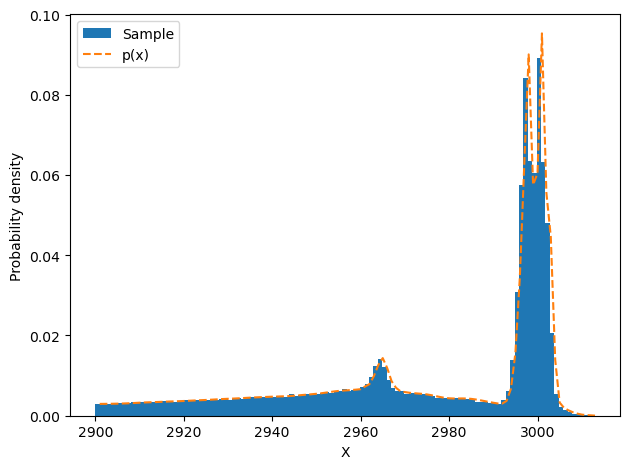

In [42]:
fig, ax = plt.subplots()
num_bins = len(dataset[:,0])

#画直方图
_, bins, patches = ax.hist(x3, num_bins, density=True,label='Sample')

ax.plot(dataset[:,0], dataset[:,1], '--',label="p(x)")
ax.set_xlabel('X')
ax.set_ylabel('Probability density')

ax.legend()
fig.tight_layout()
plt.show()